In [1]:
"""
#59
stats for cellrox and mitosox
"""

# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Apply theme
sns.set_theme(style="whitegrid")

# set options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
"""
Process file
"""
input_file = "./230223 #59 1-3hrs_001-Batch_Analysis_21022023120857.csv"
df = pd.read_csv(input_file)

# Remove redundant columns
df = df.drop(columns=["Experiment Name", "Specimen Name", "$OP", "GUID", "Record Date", "All Events %Parent"
                      ,"All Events %Total","All Events FITC-A Mean","All Events PE-A Mean","All Events APC-A Mean"
                     ,"P1 %Parent","P1 %Total","P1 FITC-A Mean","P1 PE-A Mean","P1 APC-A Mean","P3 FITC-A Mean"
                     ,"P3 %Total","P2 %Parent", "P2 %Total","P3 %Parent","P2 FITC-A Mean"])
df

,Well Name,P2 PE-A Mean,P2 APC-A Mean,P3 PE-A Mean,P3 APC-A Mean,time,strain,group,dye
0,A1,102.23,147.49,98.29,144.40,NaN,NaN,NaN,NaN
1,A2,1986.10,1234.80,1723.22,1063.26,NaN,NaN,NaN,NaN
2,A3,NaN,NaN,292.92,388.26,NaN,NaN,NaN,NaN
3,A4,1608.57,1092.60,1105.96,875.88,NaN,NaN,NaN,NaN
4,B1,2777.58,168.60,630.16,170.64,1 hour,W2,TQ 10uM,MitoSox
...,...,...,...,...,...,...,...,...,...
559,A8,67.52,100.64,64.15,97.05,3 hour,NaN,NaN,NaN
560,A9,37.91,390.96,261.45,368.28,3 hour,NaN,NaN,NaN
561,A10,-3.96,152.28,30.38,153.72,3 hour,NaN,NaN,NaN
562,A11,339.48,553.72,300.65,488.82,3 hour,NaN,NaN,NaN


In [3]:
"""
More processing to account for high TQ autofluorescences.
P2 is gated for high TQ and P3 is gated for others
Combine P2 PE-A/APC-A Mean from TQ 10uM and P3 PE-A/APC-A Mean to PE and APC columns.
"""

df_pep2 = df.loc[df.group == "TQ 10uM"]["P2 PE-A Mean"]
df_pep3 = df.loc[df.group != "TQ 10uM"]["P3 PE-A Mean"]

df_apcp2 = df.loc[df.group == "TQ 10uM"]["P2 APC-A Mean"]
df_apcp3 = df.loc[df.group != "TQ 10uM"]["P3 APC-A Mean"]

df["PE"] = df_pep2.combine_first(df_pep3)
df["APC"] = df_apcp2.combine_first(df_apcp3)


df.head(16)

,Well Name,P2 PE-A Mean,P2 APC-A Mean,P3 PE-A Mean,P3 APC-A Mean,time,strain,group,dye,PE,APC
0,A1,102.23,147.49,98.29,144.40,NaN,NaN,NaN,NaN,98.29,144.40
1,A2,1986.10,1234.80,1723.22,1063.26,NaN,NaN,NaN,NaN,1723.22,1063.26
2,A3,NaN,NaN,292.92,388.26,NaN,NaN,NaN,NaN,292.92,388.26
3,A4,1608.57,1092.60,1105.96,875.88,NaN,NaN,NaN,NaN,1105.96,875.88
4,B1,2777.58,168.60,630.16,170.64,1 hour,W2,TQ 10uM,MitoSox,2777.58,168.60
5,B2,2917.01,162.98,836.48,163.44,1 hour,W2,TQ 10uM,MitoSox,2917.01,162.98
6,B3,2650.10,180.97,555.81,175.65,1 hour,W2,TQ 10uM,MitoSox,2650.10,180.97
7,B4,2538.61,182.56,560.24,178.93,1 hour,W2,TQ 10uM,MitoSox,2538.61,182.56
8,B5,2677.43,161.10,750.80,171.46,1 hour,W2,TQ 10uM,MitoSox,2677.43,161.10
9,B6,2084.18,186.81,402.54,186.64,1 hour,W2,TQ 10uM,MitoSox,2084.18,186.81


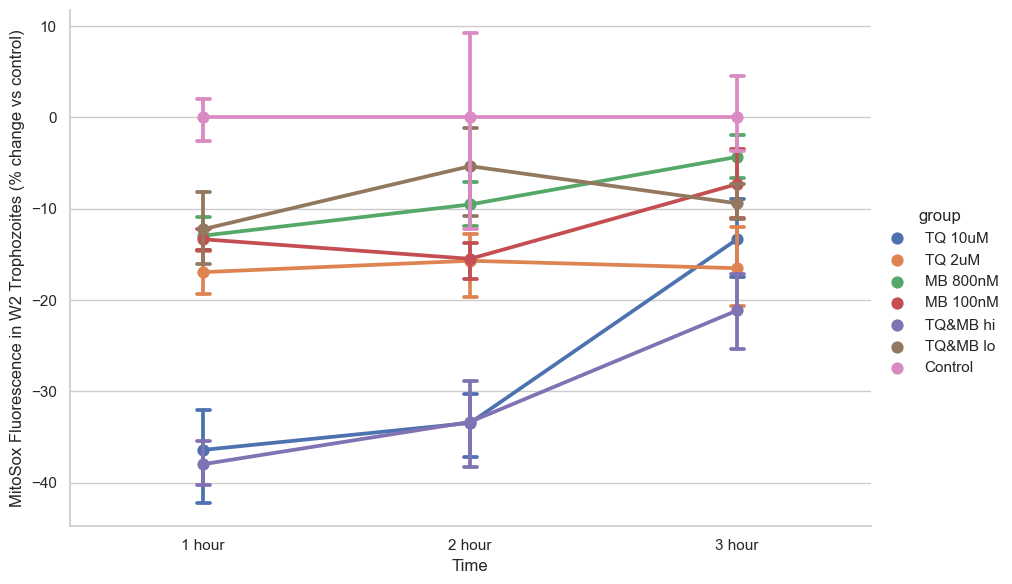

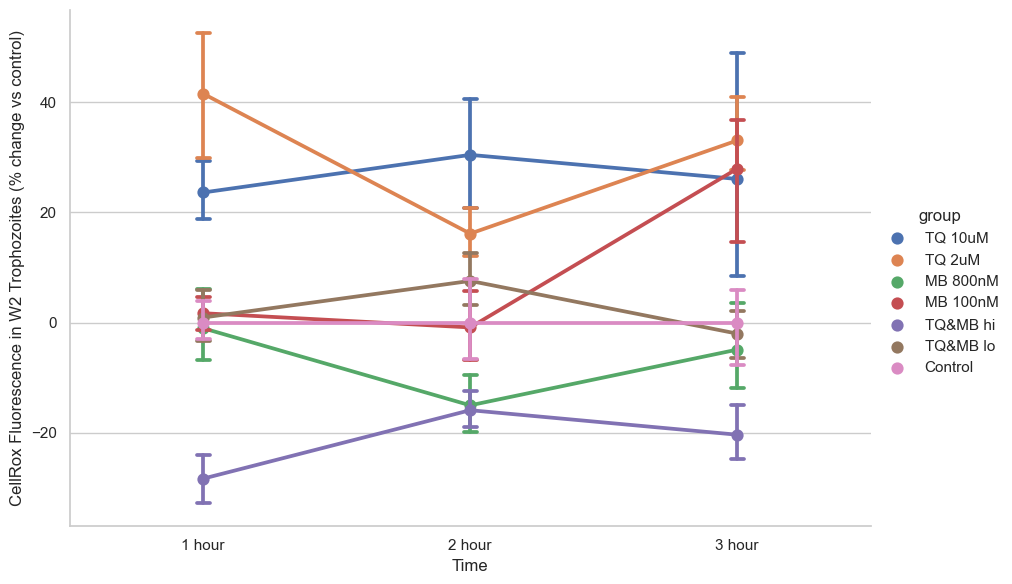

In [4]:
"""
W2 - MitoSox and CellRox normalised to control
"""

df2= df.loc[df.strain == "W2"]

strain = "W2"
stage = "Trophozoites"

dye_pop_strain_stage = [
    ("MitoSox","PE",strain, stage),
    ("CellRox","APC",strain, stage)
]

def time_vs_Mean_Fluorescence(dye,pop,strain,stage):
    
    time_list = ["1 hour", "2 hour", "3 hour"]
    for time in time_list:

        #Calculate Mean
        ################################################
        df_Control = df2.loc[(df2.group == "Control")&(df2.time == time)&(df2.dye==dye)][pop]
        df_Control_mean = df_Control.mean()

        # Normalise values
        ################################################
        df2.loc[(df2.time == time)&(df2.dye==dye), pop
                   ]= (((df2[pop]/df_Control_mean))* 100) -100

    
    
    # Set parameters for plots
    data = df2.loc[(df2.dye == dye)]
    x="time"
    y=pop
    # Skip live/dead normalisation

    ylabel=f"{dye} Fluorescence in {strain} {stage} (% change vs control)"
    
    xlabel="Time"
    height=6
    aspect=1.5
    errorbar="sd"
    hue="group"
    kind="point"
    capsize=0.05

    # Assign graph
    ax = sns.catplot(data=data, x=x, y=y, hue=hue,kind=kind,
                     height=height,aspect=aspect, errorbar=errorbar,capsize=capsize)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    # Save png file and show plot
    plt.savefig(ylabel.replace(' ','_'))
    plt.show()

for dye,pop,strain,stage in dye_pop_strain_stage:
    time_vs_Mean_Fluorescence(dye,pop,strain,stage)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:5.791e-04 t=-4.949e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:1.670e-09 t=-2.052e+01
MB 100nM vs. Control: t-test independent samples, P_val:3.184e-06 t=-9.265e+00
MB 800nM vs. Control: t-test independent samples, P_val:1.275e-05 t=-7.927e+00
TQ 2uM vs. Control: t-test independent samples, P_val:3.520e-06 t=-9.163e+00
TQ 10uM vs. Control: t-test independent samples, P_val:3.824e-07 t=-1.166e+01


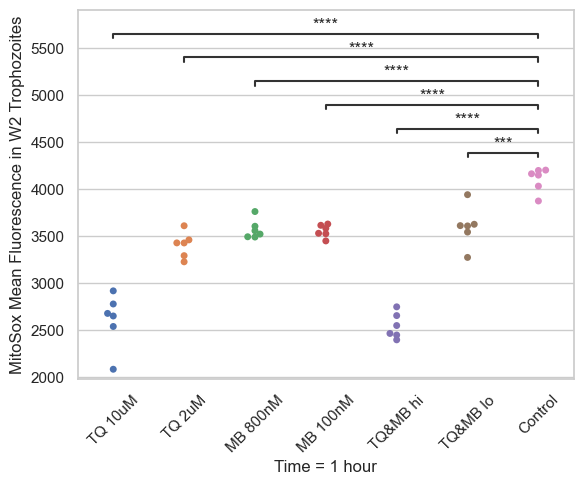

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:4.391e-01 t=-8.058e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:4.921e-04 t=-5.060e+00
MB 100nM vs. Control: t-test independent samples, P_val:3.043e-02 t=-2.519e+00
MB 800nM vs. Control: t-test independent samples, P_val:1.558e-01 t=-1.535e+00
TQ 2uM vs. Control: t-test independent samples, P_val:3.287e-02 t=-2.474e+00
TQ 10uM vs. Control: t-test independent samples, P_val:3.862e-04 t=-5.227e+00


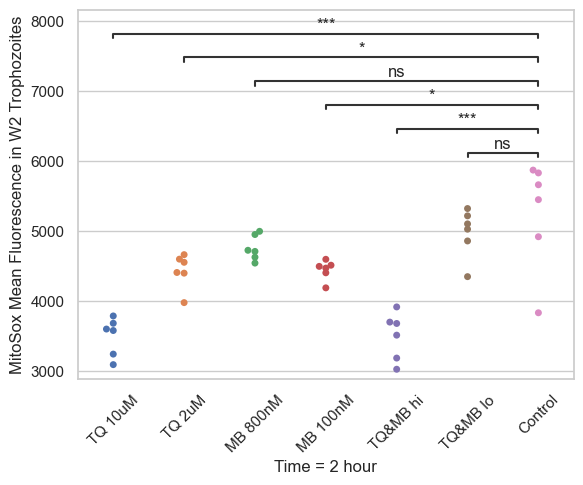

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:5.423e-03 t=-3.533e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:8.129e-05 t=-6.371e+00
MB 100nM vs. Control: t-test independent samples, P_val:4.412e-02 t=-2.302e+00
MB 800nM vs. Control: t-test independent samples, P_val:1.469e-01 t=-1.573e+00
TQ 2uM vs. Control: t-test independent samples, P_val:7.406e-04 t=-4.785e+00
TQ 10uM vs. Control: t-test independent samples, P_val:3.145e-03 t=-3.863e+00


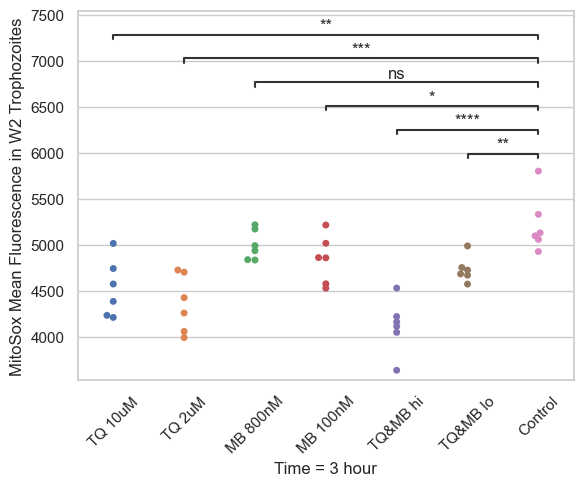

In [5]:
"""
W2
MitoSox
"""
df3= df.loc[df.strain == "W2"]
df3_mitosox = df3.loc[df3.dye == "MitoSox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df3_mitosox.loc[(df3_mitosox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="PE"
    xlabel=f"Time = {time}"
    ylabel="MitoSox Mean Fluorescence in W2 Trophozoites"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y)
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:7.894e-01 t=2.744e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:3.897e-06 t=-9.060e+00
MB 100nM vs. Control: t-test independent samples, P_val:5.296e-01 t=6.512e-01
MB 800nM vs. Control: t-test independent samples, P_val:8.124e-01 t=-2.437e-01
TQ 2uM vs. Control: t-test independent samples, P_val:1.053e-04 t=6.172e+00
TQ 10uM vs. Control: t-test independent samples, P_val:8.163e-05 t=6.368e+00


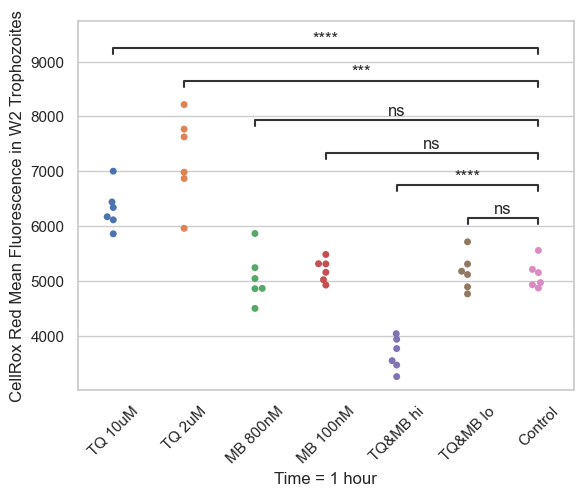

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:1.393e-01 t=1.606e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:4.066e-03 t=-3.706e+00
MB 100nM vs. Control: t-test independent samples, P_val:8.684e-01 t=-1.700e-01
MB 800nM vs. Control: t-test independent samples, P_val:1.027e-02 t=-3.153e+00
TQ 2uM vs. Control: t-test independent samples, P_val:6.095e-03 t=3.463e+00
TQ 10uM vs. Control: t-test independent samples, P_val:1.294e-03 t=4.420e+00


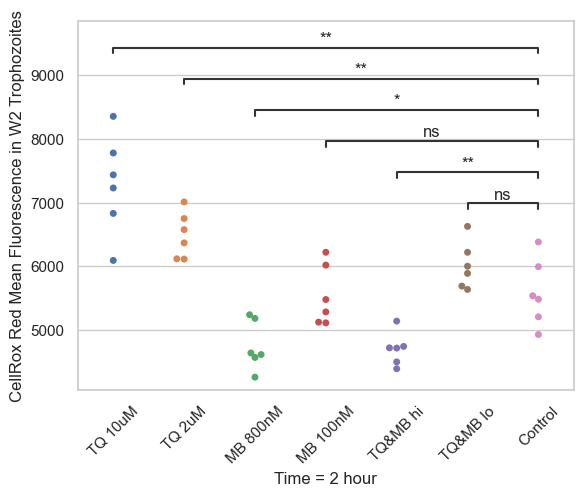

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:6.576e-01 t=-4.567e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:1.260e-03 t=-4.437e+00
MB 100nM vs. Control: t-test independent samples, P_val:4.068e-03 t=3.706e+00
MB 800nM vs. Control: t-test independent samples, P_val:4.059e-01 t=-8.677e-01
TQ 2uM vs. Control: t-test independent samples, P_val:8.415e-05 t=6.344e+00
TQ 10uM vs. Control: t-test independent samples, P_val:5.087e-02 t=2.218e+00


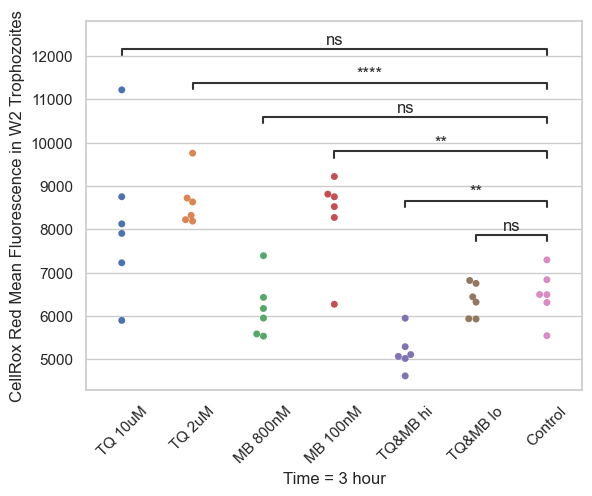

In [6]:

"""
W2
CellRox
"""
df3= df.loc[df.strain == "W2"]

df3_cellrox = df3.loc[df3.dye == "CellRox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df3_cellrox.loc[(df3_cellrox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="APC"
    xlabel=f"Time = {time}"
    ylabel="CellRox Red Mean Fluorescence in W2 Trophozoites"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y, height = height, aspect=aspect )
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

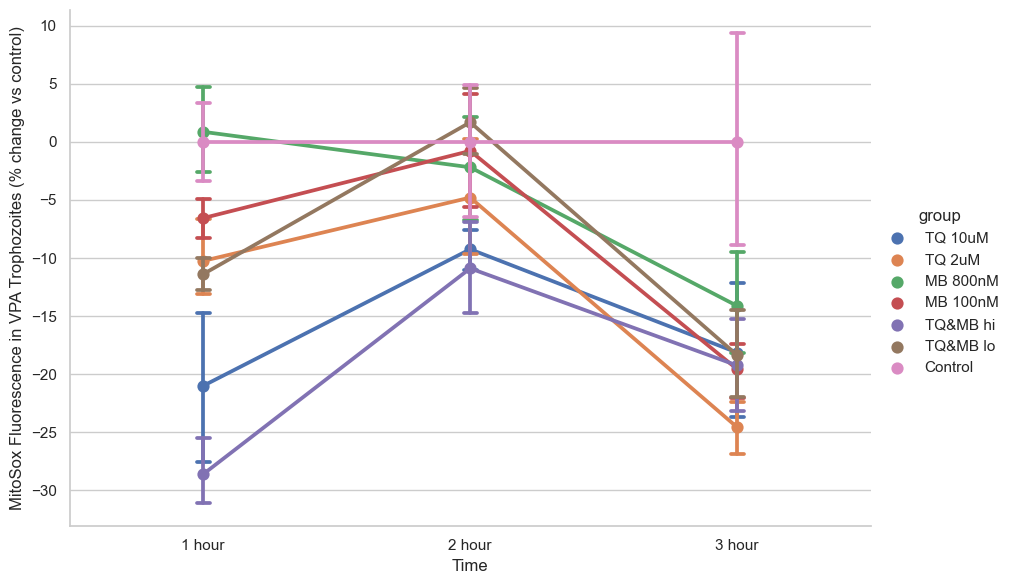

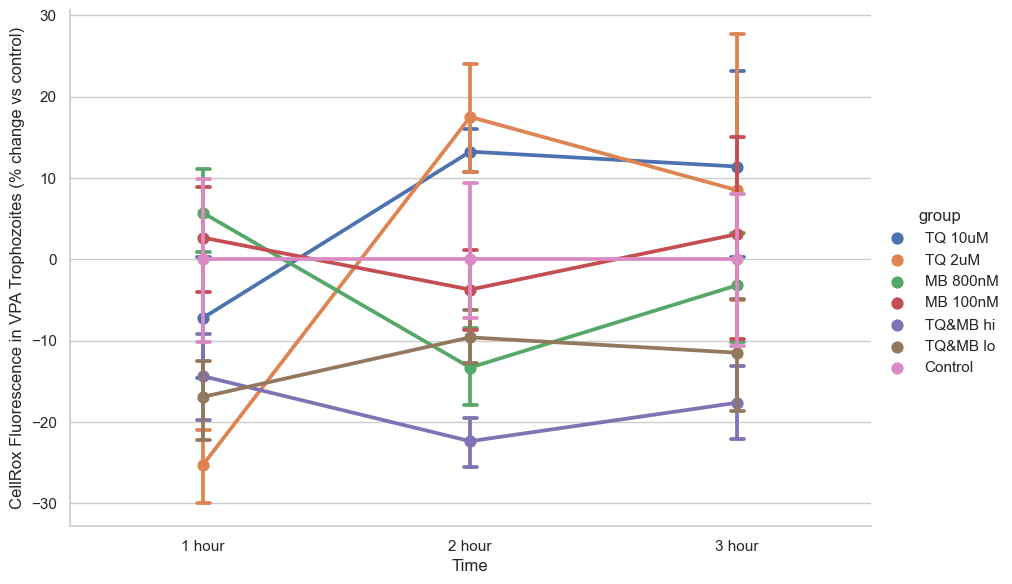

In [7]:
"""
VPA - MitoSox and CellRox normalised to control
"""

df2= df.loc[df.strain == "VPA"]

strain = "VPA"
stage = "Trophozoites"

dye_pop_strain_stage = [
    ("MitoSox","PE",strain, stage),
    ("CellRox","APC",strain, stage)
]

def time_vs_Mean_Fluorescence(dye,pop,strain,stage):
    
    time_list = ["1 hour", "2 hour", "3 hour"]
    for time in time_list:

        #Calculate Mean
        ################################################
        df_Control = df2.loc[(df2.group == "Control")&(df2.time == time)&(df2.dye==dye)][pop]
        df_Control_mean = df_Control.mean()

        # Normalise values
        ################################################
        df2.loc[(df2.time == time)&(df2.dye==dye), pop
                   ]= (((df2[pop]/df_Control_mean))* 100) -100

    
    
    # Set parameters for plots
    data = df2.loc[(df2.dye == dye)]
    x="time"
    y=pop
    # Skip live/dead normalisation

    ylabel=f"{dye} Fluorescence in {strain} {stage} (% change vs control)"
    
    xlabel="Time"
    height=6
    aspect=1.5
    errorbar="sd"
    hue="group"
    kind="point"
    capsize=0.05

    # Assign graph
    ax = sns.catplot(data=data, x=x, y=y, hue=hue,kind=kind,
                     height=height,aspect=aspect, errorbar=errorbar,capsize=capsize)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    # Save png file and show plot
    plt.savefig(ylabel.replace(' ','_'))
    plt.show()

for dye,pop,strain,stage in dye_pop_strain_stage:
    time_vs_Mean_Fluorescence(dye,pop,strain,stage)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:3.028e-04 t=-5.397e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:4.771e-07 t=-1.139e+01
MB 100nM vs. Control: t-test independent samples, P_val:1.414e-02 t=-2.966e+00
MB 800nM vs. Control: t-test independent samples, P_val:7.721e-01 t=2.976e-01
TQ 2uM vs. Control: t-test independent samples, P_val:3.839e-03 t=-3.741e+00
TQ 10uM vs. Control: t-test independent samples, P_val:5.643e-04 t=-4.967e+00


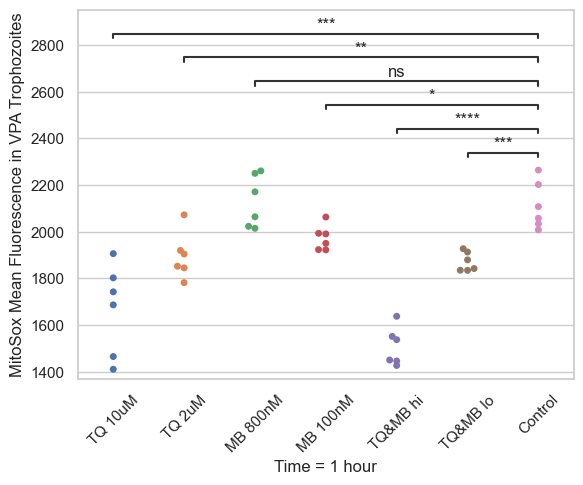

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:6.573e-01 t=4.573e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:2.156e-02 t=-2.720e+00
MB 100nM vs. Control: t-test independent samples, P_val:8.621e-01 t=-1.783e-01
MB 800nM vs. Control: t-test independent samples, P_val:6.184e-01 t=-5.140e-01
TQ 2uM vs. Control: t-test independent samples, P_val:3.061e-01 t=-1.079e+00
TQ 10uM vs. Control: t-test independent samples, P_val:2.281e-02 t=-2.687e+00


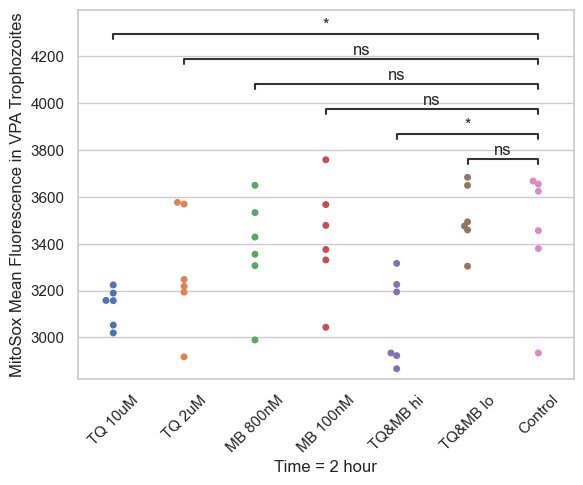

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:7.343e-03 t=-3.352e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:5.489e-03 t=-3.525e+00
MB 100nM vs. Control: t-test independent samples, P_val:3.477e-03 t=-3.802e+00
MB 800nM vs. Control: t-test independent samples, P_val:2.805e-02 t=-2.567e+00
TQ 2uM vs. Control: t-test independent samples, P_val:7.565e-04 t=-4.770e+00
TQ 10uM vs. Control: t-test independent samples, P_val:1.157e-02 t=-3.084e+00


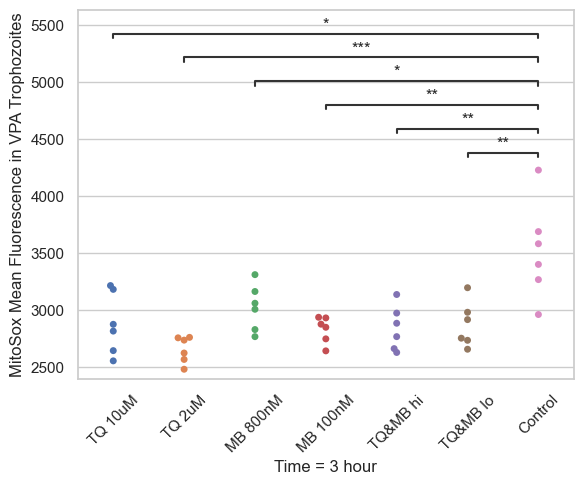

In [8]:
"""
VPA
MitoSox
"""
df3= df.loc[df.strain == "VPA"]
df3_mitosox = df3.loc[df3.dye == "MitoSox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df3_mitosox.loc[(df3_mitosox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="PE"
    xlabel=f"Time = {time}"
    ylabel="MitoSox Mean Fluorescence in VPA Trophozoites"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y)
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:2.297e-02 t=-2.683e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:5.045e-02 t=-2.223e+00
MB 100nM vs. Control: t-test independent samples, P_val:7.066e-01 t=3.874e-01
MB 800nM vs. Control: t-test independent samples, P_val:3.940e-01 t=8.908e-01
TQ 2uM vs. Control: t-test independent samples, P_val:2.325e-03 t=-4.050e+00
TQ 10uM vs. Control: t-test independent samples, P_val:3.292e-01 t=-1.026e+00


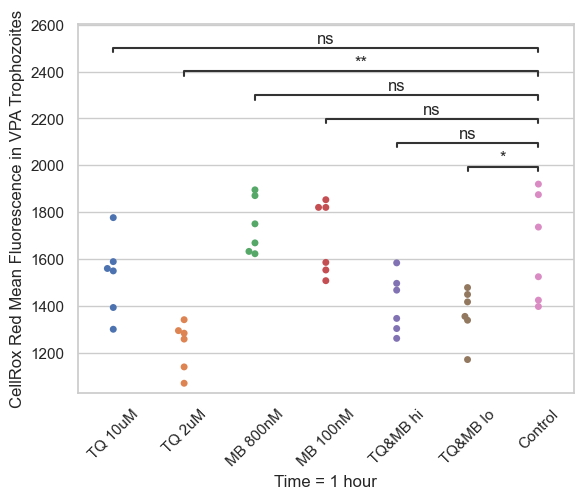

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:8.551e-02 t=-1.908e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:1.160e-03 t=-4.490e+00
MB 100nM vs. Control: t-test independent samples, P_val:5.158e-01 t=-6.736e-01
MB 800nM vs. Control: t-test independent samples, P_val:3.355e-02 t=-2.462e+00
TQ 2uM vs. Control: t-test independent samples, P_val:1.621e-02 t=2.886e+00
TQ 10uM vs. Control: t-test independent samples, P_val:2.316e-02 t=2.678e+00


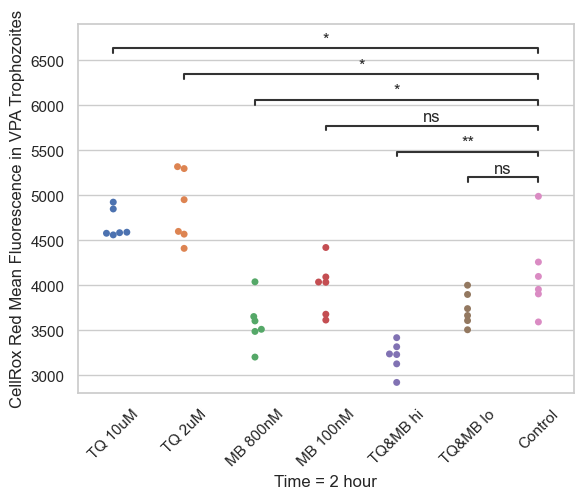

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:1.037e-01 t=-1.790e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:1.082e-02 t=-3.123e+00
MB 100nM vs. Control: t-test independent samples, P_val:7.238e-01 t=3.635e-01
MB 800nM vs. Control: t-test independent samples, P_val:6.212e-01 t=-5.099e-01
TQ 2uM vs. Control: t-test independent samples, P_val:4.476e-01 t=7.904e-01
TQ 10uM vs. Control: t-test independent samples, P_val:2.016e-01 t=1.367e+00


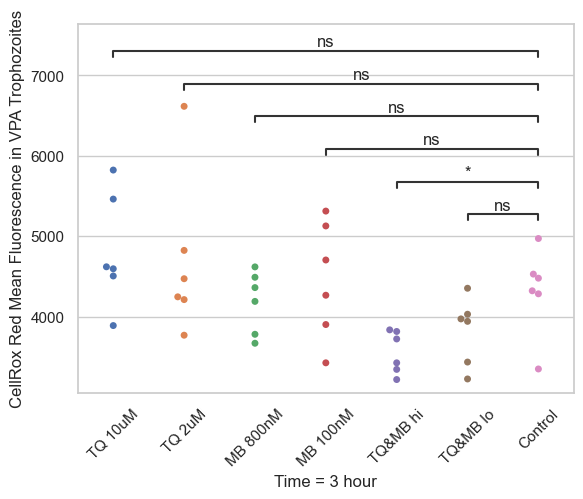

In [9]:

"""
VPA
CellRox
"""
df3= df.loc[df.strain == "VPA"]

df3_cellrox = df3.loc[df3.dye == "CellRox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df3_cellrox.loc[(df3_cellrox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="APC"
    xlabel=f"Time = {time}"
    ylabel="CellRox Red Mean Fluorescence in VPA Trophozoites"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y, height = height, aspect=aspect )
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()